2367574.5
9921.849609375
4693.880859375
2775.199951171875
2017.0699462890625
1631.0482177734375
1393.5511474609375
1231.118896484375
1110.64697265625
1016.9358520507812


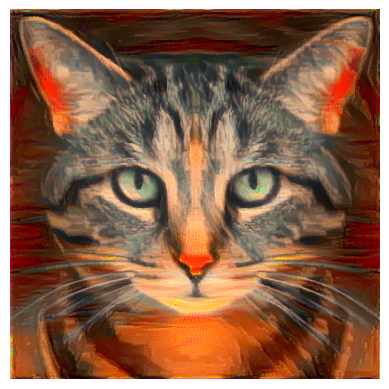

In [13]:
from style_vgg import *
import matplotlib.pyplot as plt
import numpy as np

style_path = "../data/style/der_schrei.jpg"
content_path = "../data/content/cat.jpg"
output_path = "../outputs/1.png"

device = "cuda:0"
content_block = 4

content_img = preprocess(content_path).to(device)
style_img = preprocess(style_path).to(device)
generated_img = content_img.clone().requires_grad_().to(device)
# generated_img = torch.randn(content_img.size(), device=device).requires_grad_().to(device)


vgg_feature = make_net(device)


style_target = list(GramMatrix().to(device)(feature_map)  for feature_map in vgg_feature(style_img))
content_target = vgg_feature(content_img)[content_block-1]
style_weight = [ 1/(n**2)   for n in [64,128,256,512,512] ]


optimizer = torch.optim.Adam([generated_img], lr=0.01)

for epoch in range(1000):
    optimizer.zero_grad()
    out = vgg_feature(generated_img)

    ## style loss ##
    style_loss = [ GramMSELoss().to(device)(out[i],style_target[i])*style_weight[i] for i in range(5) ]

    ## content loss ##
    content_loss = nn.MSELoss().to(device)(out[content_block-1], content_target)

    ## total loss ##
    total_loss = 10*sum(style_loss) + torch.mean(content_loss)

    total_loss.backward()
    if epoch % 100 == 0:
        print(total_loss.item())

    optimizer.step()
    

gen_img = postprocess(generated_img.cpu()).data.numpy()

plt.imshow(gen_img)
plt.axis(False)
plt.show()

In [16]:
int_gen_img = np.clip(gen_img * 255, 0, 255).astype(np.uint8)
img = Image.fromarray(int_gen_img)
img.save(output_path, 'png')